In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_clean_data = pd.read_csv(r'C:\Users\Agustín\Desktop\4Geeks\Clases\30. Proyecto Final\Polar WebApp\PolarWeb\export.csv')

In [5]:
df_clean_data.head()

,Unnamed: 0,Date,Tweet,Tweet_Likes,Sentiment
0,0,Tue Oct 15 17:33:20 +0000 2024,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive
1,1,Tue Oct 15 17:33:19 +0000 2024,@resul_fcb Messi 🍇d me when I was 14,0,Positive
2,2,Tue Oct 15 17:33:19 +0000 2024,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative
3,3,Tue Oct 15 17:33:19 +0000 2024,@Mariapilar1397 You're going to have him for 7...,0,Negative
4,4,Tue Oct 15 17:33:18 +0000 2024,@ActuFoot_ Messi and Neymar were so right,0,Negative


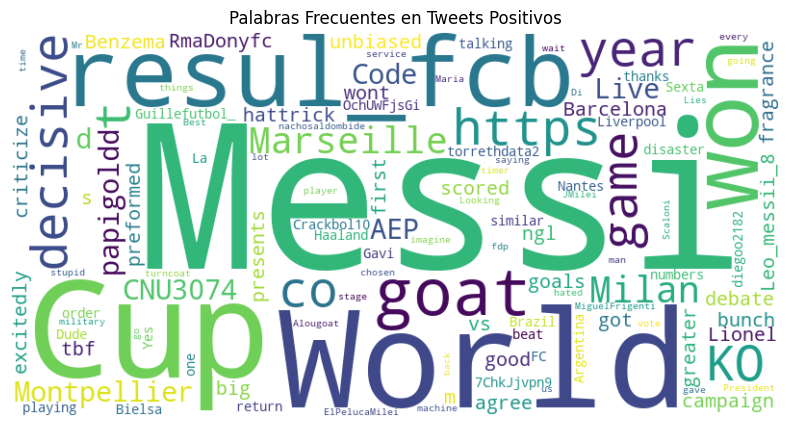

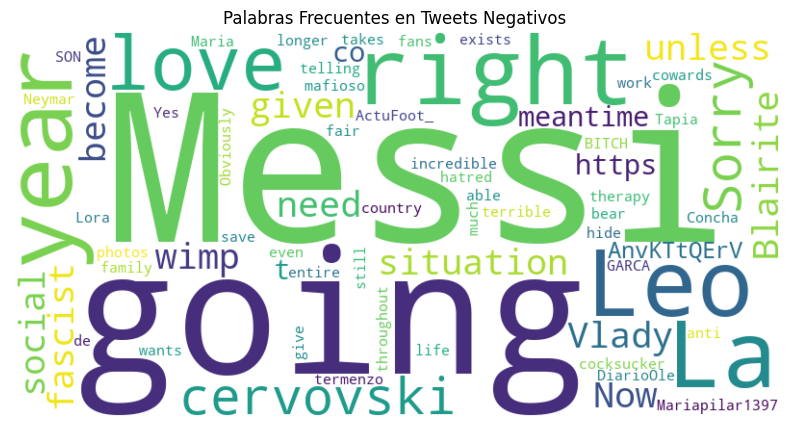

In [6]:
from wordcloud import WordCloud

# WordCloud para tweets positivos
positive_tweets = ' '.join(df_clean_data[df_clean_data['Sentiment'] == 'Positive']['Tweet'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Tweets Positivos')
plt.show()

# WordCloud para tweets negativos
negative_tweets = ' '.join(df_clean_data[df_clean_data['Sentiment'] == 'Negative']['Tweet'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Tweets Negativos')
plt.show()

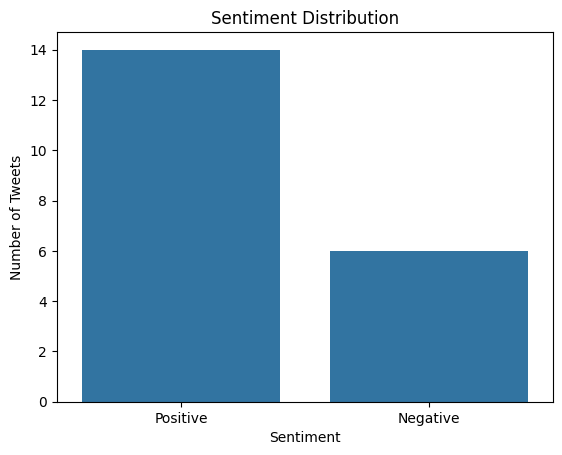

In [7]:
# Sentiment Distribution
sentiment_counts = df_clean_data['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
def sentiment_dist(df):
    sentiment_counts = df['Sentiment'].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()

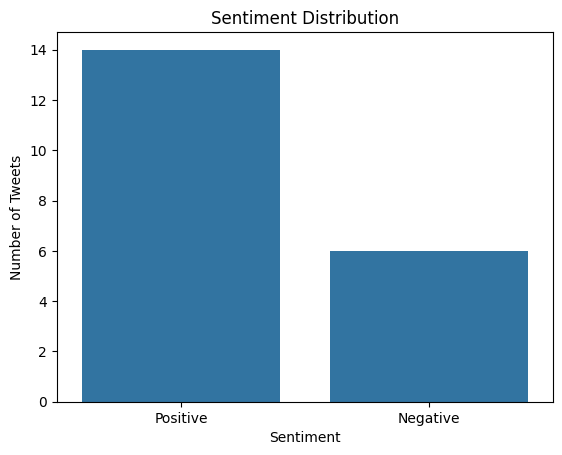

In [9]:
sentiment_dist(df_clean_data)

In [10]:
def format_data_model_output(df):
    df_clean_data = df.copy()
    if 'Unnamed: 0' in df_clean_data.columns:
        df_clean_data = df_clean_data.drop('Unnamed: 0', axis=1)
    df_clean_data['Date'] = pd.to_datetime(df_clean_data['Date'])
    df_clean_data['Year'] = df_clean_data['Date'].dt.year
    df_clean_data['Month'] = df_clean_data['Date'].dt.month
    df_clean_data['Date'] = df_clean_data['Date'].dt.date
    df_clean_data['Words_count'] = df_clean_data['Tweet'].str.split().apply(len)
    return df_clean_data

def obtain_summary(df):
    frecuency_dates = df['Date'].value_counts()
    df_results = pd.DataFrame(frecuency_dates).reset_index()
    df_results.columns = ['Date', 'Tweets_count']
    average_word_counts = []
    positive_ratio = []
    for date in df_results['Date']:
        # Filtrar df por fecha 
        filtered_tweets = df[df['Date'] == date]
        # suma y conteo de words_count
        total_words = filtered_tweets['Words_count'].sum()      # sumo los totales
        count_tweets = filtered_tweets['Words_count'].count()   # cuento por fecha
        average = total_words / count_tweets if count_tweets > 0 else 0  
        average_word_counts.append(average)
        # Positives count
        total_positives = (filtered_tweets['Sentiment']=='Positive').sum()  
        count_tweets = filtered_tweets['Sentiment'].count()  # total rows
        ratio = total_positives / count_tweets 
        positive_ratio.append(ratio)
    df_results['Average_word_count'] = average_word_counts
    df_results['Positive_ratio'] = positive_ratio
    summary = df_results.copy()
    return summary

In [14]:
format_data_model_output(df_clean_data).head()

C:\Program Files\KMSpico\temp\ipykernel_2972\3152869891.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean_data['Date'] = pd.to_datetime(df_clean_data['Date'])


,Date,Tweet,Tweet_Likes,Sentiment,Year,Month,Words_count
0,2024-10-15,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive,2024,10,8
1,2024-10-15,@resul_fcb Messi 🍇d me when I was 14,0,Positive,2024,10,8
2,2024-10-15,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative,2024,10,28
3,2024-10-15,@Mariapilar1397 You're going to have him for 7...,0,Negative,2024,10,32
4,2024-10-15,@ActuFoot_ Messi and Neymar were so right,0,Negative,2024,10,7


In [15]:
def obtain_summary(df):
    frecuency_dates = df['Date'].value_counts()
    print(frecuency_dates)
    df_results = pd.DataFrame(frecuency_dates).reset_index()
    df_results.columns = ['Date', 'Tweets_count']
    average_word_counts = []
    positive_ratio = []
    for date in df_results['Date']:
        # Filtrar df por fecha 
        filtered_tweets = df[df['Date'] == date]
        # suma y conteo de words_count
        total_words = filtered_tweets['Words_count'].sum()      # sumo los totales
        count_tweets = filtered_tweets['Words_count'].count()   # cuento por fecha
        average = total_words / count_tweets if count_tweets > 0 else 0  
        average_word_counts.append(average)
        # Positives count
        total_positives = (filtered_tweets['Sentiment']=='Positive').sum()  
        count_tweets = filtered_tweets['Sentiment'].count()  # total rows
        ratio = total_positives / count_tweets 
        positive_ratio.append(ratio)
    df_results['Average_word_count'] = average_word_counts
    df_results['Positive_ratio'] = positive_ratio
    summary = df_results.copy()
    return summary

In [17]:
df_clean_data.head()

,Unnamed: 0,Date,Tweet,Tweet_Likes,Sentiment
0,0,Tue Oct 15 17:33:20 +0000 2024,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive
1,1,Tue Oct 15 17:33:19 +0000 2024,@resul_fcb Messi 🍇d me when I was 14,0,Positive
2,2,Tue Oct 15 17:33:19 +0000 2024,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative
3,3,Tue Oct 15 17:33:19 +0000 2024,@Mariapilar1397 You're going to have him for 7...,0,Negative
4,4,Tue Oct 15 17:33:18 +0000 2024,@ActuFoot_ Messi and Neymar were so right,0,Negative


In [16]:
obtain_summary(df_clean_data)

Date
Tue Oct 15 17:33:19 +0000 2024    3
Tue Oct 15 17:33:14 +0000 2024    2
Tue Oct 15 17:33:03 +0000 2024    2
Tue Oct 15 17:33:20 +0000 2024    1
Tue Oct 15 17:33:18 +0000 2024    1
Tue Oct 15 17:33:16 +0000 2024    1
Tue Oct 15 17:33:15 +0000 2024    1
Tue Oct 15 17:33:12 +0000 2024    1
Tue Oct 15 17:33:11 +0000 2024    1
Tue Oct 15 17:33:10 +0000 2024    1
Tue Oct 15 17:33:09 +0000 2024    1
Tue Oct 15 17:33:07 +0000 2024    1
Tue Oct 15 17:33:05 +0000 2024    1
Tue Oct 15 17:33:00 +0000 2024    1
Tue Oct 15 17:32:59 +0000 2024    1
Tue Oct 15 17:32:58 +0000 2024    1
Name: count, dtype: int64


KeyError: 'Words_count'